# Hands on Modeling Rare Events in Time Series, with Python

## Raw Data Display

In [19]:
!pip install dataframe_image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 75.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: yarlm╺━━━━━━━━━━━━━━━━━━━━━━━━━━━  3/10 [cssutils]
    Found existing installation: yarl 1.9.4━━━━━━━━━━━━━━━━━━━  3/10 [cssutils]
    Uninstalling yarl-1.9.4:0m━━━━━━━━━━━━━━━━━━━━━━━━━━━  3/10 [cssutils]
      Successfully uninstalled yarl-1.9.4━━━━━━━━━━━━━━━━━━━━━  3/10 [cssutils]
  Attempting uninstall: aiohttp━━━━━╺━━━━━━━━━━━  7/10 [playwright]
    Found existing installation: aiohttp 3.9.3━━━━━━━━━━━  7/10 [playwright]
    Uninstalling aiohttp-3.9.3:━╺━━━━━━━━━━━  7/10 [playwright]
      Successfully uninstalled aiohttp-3.9.30m━━━━━━━━━━━  7/10 [playwright]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [dataframe_image]aywright]


In [32]:
temp = data.raw_data
temp = temp[temp.columns.tolist()[0:5]]

In [46]:
from data import Data
import pandas as pd
data = Data()
len(data.raw_data.columns.tolist())-1

36

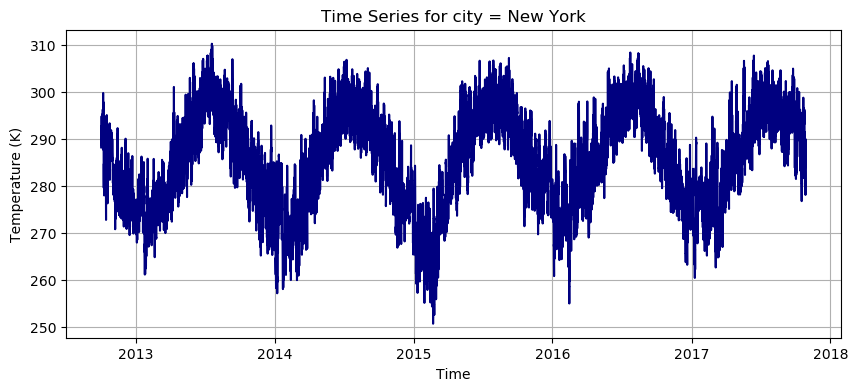

In [4]:
data.plot_city(city = 'New York')

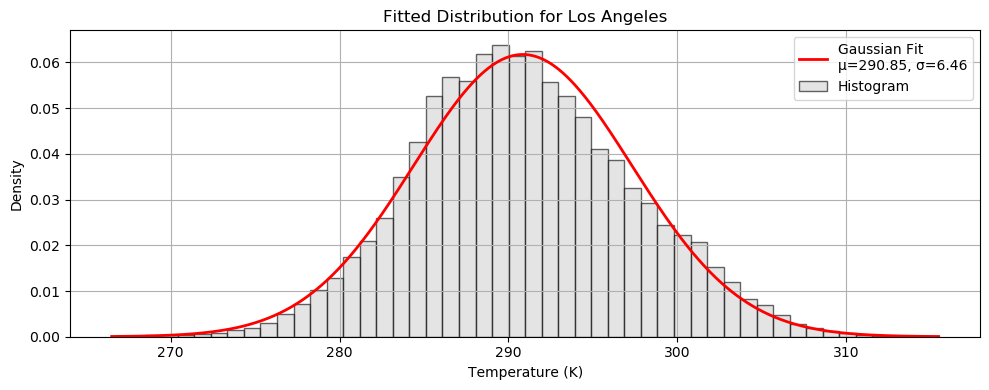

In [8]:
data.plot_distribution_city(city = 'Los Angeles')

## Picking a specific city: 
This is the code to select a specific city in the columns. 

In [49]:
data.isolate_city(city = 'Houston')
processed_data = data.clean_and_preprocess()
print(processed_data.head().to_markdown())

|    |       y | datetime            | date       |   month |   year |
|---:|--------:|:--------------------|:-----------|--------:|-------:|
|  1 | 288.27  | 2012-10-01 13:00:00 | 2012-10-01 |      10 |   2012 |
|  2 | 288.298 | 2012-10-01 14:00:00 | 2012-10-01 |      10 |   2012 |
|  3 | 288.334 | 2012-10-01 15:00:00 | 2012-10-01 |      10 |   2012 |
|  4 | 288.371 | 2012-10-01 16:00:00 | 2012-10-01 |      10 |   2012 |
|  5 | 288.408 | 2012-10-01 17:00:00 | 2012-10-01 |      10 |   2012 |


## Distribution of rare events:

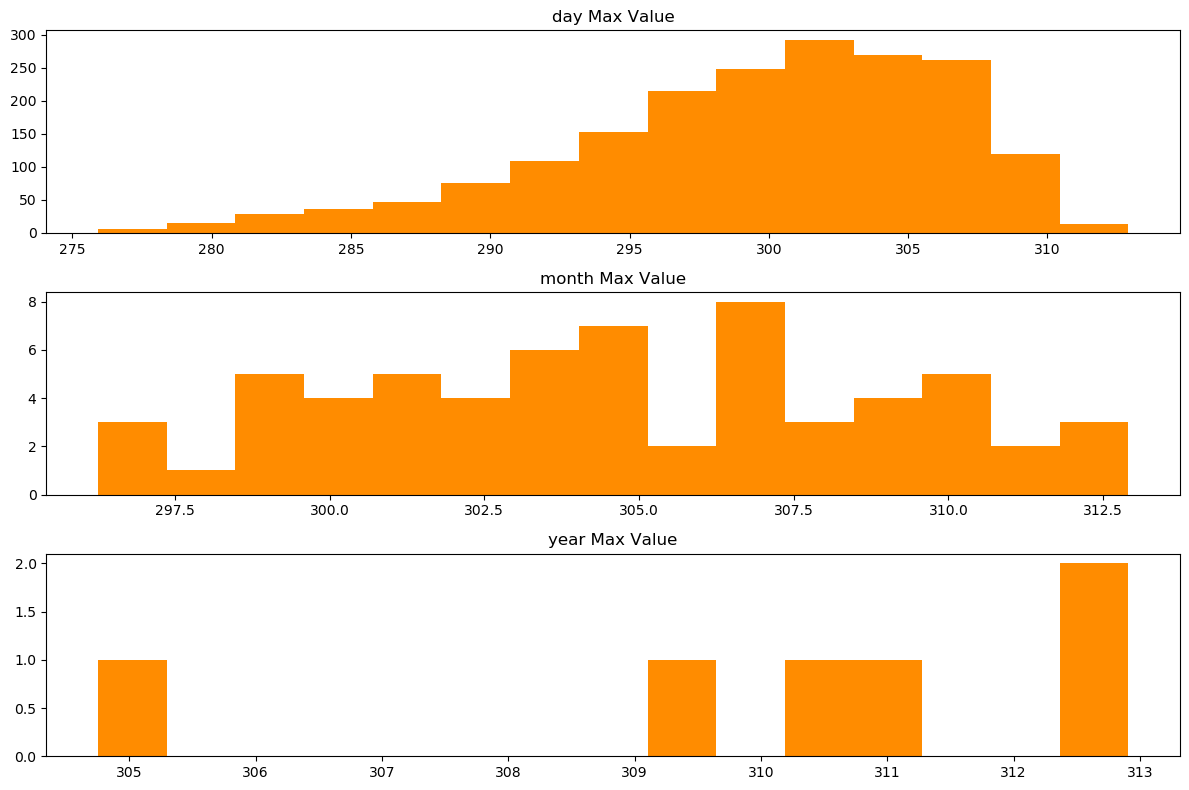

In [47]:
from rare_events_processor import RareEventsToolbox
rare_events_toolbox = RareEventsToolbox(data = processed_data)
max_values_result = rare_events_toolbox.extract_max_values()
rare_events_toolbox.plot_distributions()

In [48]:
rare_events_toolbox.fit_all_distributions()
best_dist, ranked_scores = rare_events_toolbox.rank_distributions(key = 'day', rank_based_on = 'bic')
ranked_scores


,log_likelihood,aic,bic
gumbel,-6143.649930,12291.299861,12302.385348
weibull,-6143.646327,12293.292655,12309.920885
gev,-6155.743963,12317.487925,12334.116156


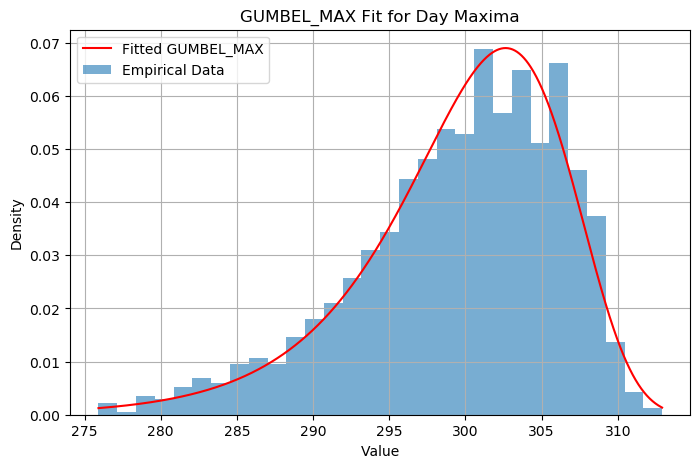

In [49]:
rare_events_toolbox.plot_fitted_distribution(key = 'day', dist_type = best_dist)

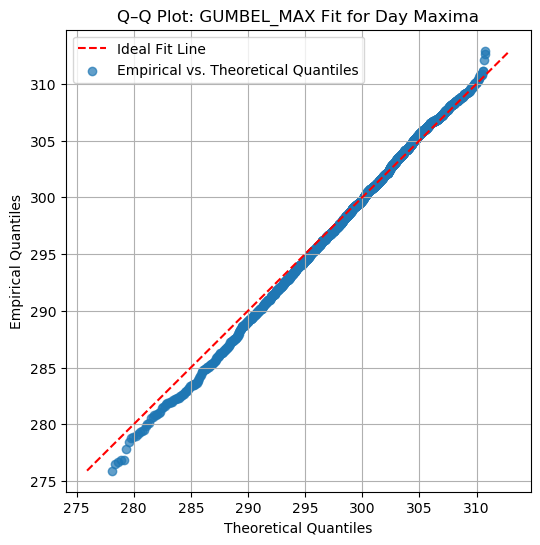

In [50]:
rare_events_toolbox.plot_qq(key = 'day', dist_type = best_dist)

In [51]:
cities = data.all_cities()
all_cities_dict = {city : {} for city in cities}
for city in cities:
    data.isolate_city(city = city)
    processed_data = data.clean_and_preprocess()
    rare_events_toolbox = RareEventsToolbox(data = processed_data)
    max_values_result = rare_events_toolbox.extract_max_values()
    rare_events_toolbox.fit_all_distributions()
    best_dist, ranked_scores = rare_events_toolbox.rank_distributions(key = 'day', rank_based_on = 'bic')
    all_cities_dict[city] = rare_events_toolbox.distribution_fit[best_dist]['day']


In [52]:
all_cities_dict[cities[0]]

{'dist_type': 'gev',
 'param': (0.5440588013153485, 288.2858877212984, 10.868834065510871),
 'dist': <scipy.stats._continuous_distns.genextreme_gen at 0x147eab1c0>,
 'metrics': {'log_likelihood': -6904.515455707107,
  'aic': 13815.030911414215,
  'bic': 13831.659142050321}}

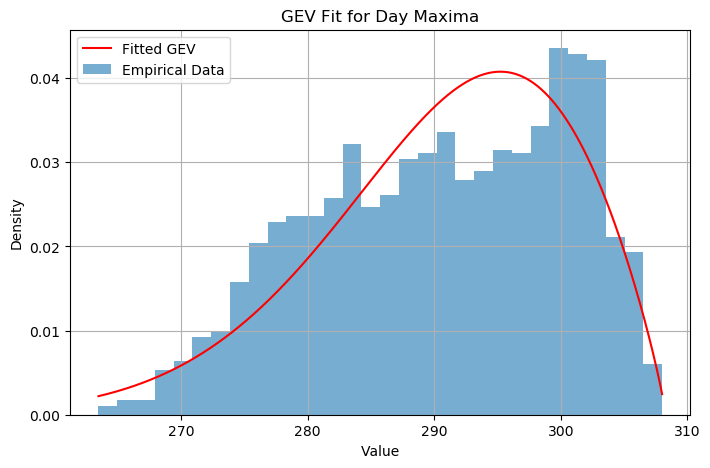

In [54]:
from rare_events_processor import RareEventsToolbox
data = Data()
data.isolate_city(city = cities[0])
processed_data = data.clean_and_preprocess()
rare_events_toolbox = RareEventsToolbox(data = processed_data)
max_values_result = rare_events_toolbox.extract_max_values()
rare_events_toolbox.fit_all_distributions()
best_dist, ranked_scores = rare_events_toolbox.rank_distributions(key = 'day', rank_based_on = 'bic')
ranked_scores
rare_events_toolbox.plot_fitted_distribution(key = 'day', dist_type = best_dist)

In [55]:
all_cities_dict[cities[5]]

{'dist_type': 'weibull_min',
 'param': (10.813778285500355, 221.90226629829428, 76.43154046134636),
 'dist': <scipy.stats._continuous_distns.weibull_min_gen at 0x147eab5e0>,
 'metrics': {'log_likelihood': -6584.323703930169,
  'aic': 13174.647407860339,
  'bic': 13191.275638496445}}

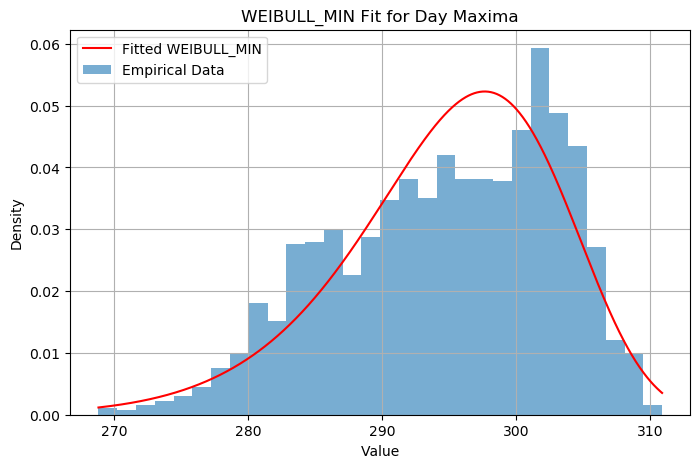

In [56]:
from rare_events_processor import RareEventsToolbox
data = Data()
data.isolate_city(city = cities[5])
processed_data = data.clean_and_preprocess()
rare_events_toolbox = RareEventsToolbox(data = processed_data)
max_values_result = rare_events_toolbox.extract_max_values()
rare_events_toolbox.fit_all_distributions()
best_dist, ranked_scores = rare_events_toolbox.rank_distributions(key = 'day', rank_based_on = 'bic')
ranked_scores
rare_events_toolbox.plot_fitted_distribution(key = 'day', dist_type = best_dist)